In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.decomposition import PCA 
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", 500)

In [111]:
!pip install dexplot
import dexplot

In [2]:
df = pd.read_csv("clean_lending_dataset.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [3]:
len(df.emp_title.unique())
df.head()

,emp_title,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,annual_inc,tot_hi_cred_lim,chargeoff_within_12_mths,total_pymnt,pub_rec_bankruptcies,dti,delinq_2yrs,addr_state,purpose,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status,pymnt_plan,zip_code,term,emp_length,mths_since_last_delinq,issue_d,earliest_cr_line,loan_status
0,Chef,2500,2500,2500.0,84.92,13.56,55000.0,60124.0,0.0,167.02,1.0,18.24,0.0,NY,debt_consolidation,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,109,36,10,226.0,0,6453,0
1,Postmaster,30000,30000,30000.0,777.23,18.94,90000.0,372872.0,0.0,1507.11,1.0,26.52,0.0,LA,debt_consolidation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,713,60,10,71.0,0,11506,0
2,Administrative,5000,5000,5000.0,180.69,17.97,59280.0,136927.0,0.0,353.89,0.0,10.51,0.0,MI,debt_consolidation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,490,36,6,226.0,0,2801,0
3,IT Supervisor,4000,4000,4000.0,146.51,18.94,92000.0,385183.0,0.0,286.71,0.0,16.74,0.0,WA,debt_consolidation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,985,36,10,226.0,0,4686,0
4,Mechanic,30000,30000,30000.0,731.78,16.14,57250.0,157548.0,0.0,1423.21,0.0,26.35,0.0,MD,debt_consolidation,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,212,60,10,226.0,0,6574,0


In [10]:
df.columns

Index(['emp_title', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'int_rate', 'annual_inc', 'tot_hi_cred_lim',
       'chargeoff_within_12_mths', 'total_pymnt', 'pub_rec_bankruptcies',
       'dti', 'delinq_2yrs', 'addr_state', 'purpose', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'term_ 36 months', 'term_ 60 mo

In [11]:
len(df.emp_title.unique())

512495

In [12]:
len(df.emp_title.str.lower().str.strip().str.replace("[^\w\s]", "").unique())
       
       

399396

### Visualizations 

In [13]:
df.head()

,emp_title,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,annual_inc,tot_hi_cred_lim,chargeoff_within_12_mths,total_pymnt,pub_rec_bankruptcies,dti,delinq_2yrs,addr_state,purpose,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_ 36 months,term_ 60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status,pymnt_plan,zip_code,term,emp_length,mths_since_last_delinq,issue_d,earliest_cr_line,loan_status
0,Chef,2500,2500,2500.0,84.92,13.56,55000.0,60124.0,0.0,167.02,1.0,18.24,0.0,NY,debt_consolidation,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,109,36,10,226.0,0,6453,0
1,Postmaster,30000,30000,30000.0,777.23,18.94,90000.0,372872.0,0.0,1507.11,1.0,26.52,0.0,LA,debt_consolidation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,713,60,10,71.0,0,11506,0
2,Administrative,5000,5000,5000.0,180.69,17.97,59280.0,136927.0,0.0,353.89,0.0,10.51,0.0,MI,debt_consolidation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,490,36,6,226.0,0,2801,0
3,IT Supervisor,4000,4000,4000.0,146.51,18.94,92000.0,385183.0,0.0,286.71,0.0,16.74,0.0,WA,debt_consolidation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,985,36,10,226.0,0,4686,0
4,Mechanic,30000,30000,30000.0,731.78,16.14,57250.0,157548.0,0.0,1423.21,0.0,26.35,0.0,MD,debt_consolidation,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,212,60,10,226.0,0,6574,0


annual_inc, dti (percentage of monthly income that goes towards paying monthly debt) 

In [14]:
df.annual_inc.describe()

count    2.092883e+06
mean     7.985260e+04
std      1.154203e+05
min      0.000000e+00
25%      4.800000e+04
50%      6.700000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [15]:
df.annual_inc.median()

67000.0

In [16]:
df.annual_inc.quantile(0.95)

165000.0

### Distribution of Income

Text(0.5, 1.0, 'Distribution of the Annual Incomes')

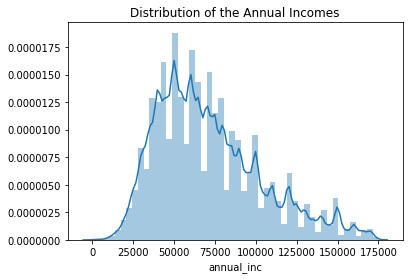

In [17]:
sns.distplot(df[df.annual_inc < 175000]["annual_inc"]);
plt.title("Distribution of the Annual Incomes")
#plt.xlim(left = 0)
#plt.xlim(right = 250000)

In [18]:
df.annual_inc.value_counts().head(10)

60000.0     81562
50000.0     71378
65000.0     61903
70000.0     59253
80000.0     57331
75000.0     55798
40000.0     55217
45000.0     51301
55000.0     49196
100000.0    44979
Name: annual_inc, dtype: int64

Most frequent income is 60k, then 50k. Most income between 40k-80k. 

### Annual Income vs. Loan Amount

In [19]:
df95 = df[df.annual_inc <= 175000]

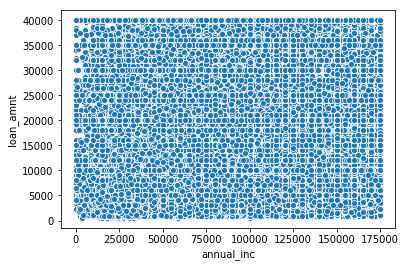

In [20]:
sns.scatterplot(df95["annual_inc"], df95["loan_amnt"]);

Too many points for each of the different annual income amounts, so bin them and look at their different distributions 

In [5]:
df["income_bin"] = df["annual_inc"].apply(lambda x: "025000" if x <= 25000
                                          else "050000" if (x > 25000) and (x <= 50000)
                                          else "075000" if (x > 50000) and (x <= 75000)
                                          else "100000" if (x > 75000) and (x <= 100000)
                                          else "125000" if (x > 100000) and (x <= 125000)
                                          else "150000" if (x > 125000) and (x <= 150000) 
                                          else "175000")

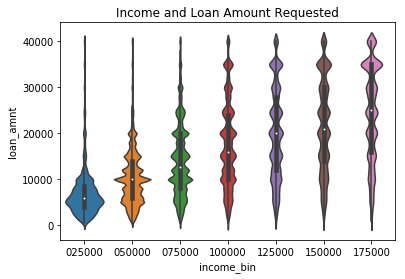

In [22]:
sns.violinplot(x = "income_bin", y = "loan_amnt", data = df);
plt.title("Income and Loan Amount Requested");

In [23]:
mean = pd.DataFrame(df.groupby("income_bin")["loan_amnt"].mean())
mean.columns = ["mean"]
median = pd.DataFrame(df.groupby("income_bin")["loan_amnt"].median())
median.columns = ["median"]
min_ = pd.DataFrame(df.groupby("income_bin")["loan_amnt"].min())
min_.columns = ["min"]
max_ = pd.DataFrame(df.groupby("income_bin")["loan_amnt"].max())
max_.columns = ["max"]
q1 = pd.DataFrame(df.groupby("income_bin")["loan_amnt"].quantile(0.25))
q1.columns = ["quantile_25"]
q3 = pd.DataFrame(df.groupby("income_bin")["loan_amnt"].quantile(0.75))
q3.columns = ["quantile_75"]
std = pd.DataFrame(df.groupby("income_bin")["loan_amnt"].std())
std.columns = ["std"]
#
pd.concat([mean, median, min_, max_, q1, q3, std], axis = 1)

,mean,median,min,max,quantile_25,quantile_75,std
income_bin,,,,,,,
025000,7345.329319,6000,500,40000,4000.0,8625.0,5782.287566
050000,10478.557377,10000,500,40000,6000.0,14000.0,5960.381279
075000,14260.115222,12800,500,40000,8100.0,20000.0,7795.171509
100000,17629.482066,16000,500,40000,10000.0,24000.0,9276.954104
125000,19976.559845,20000,1000,40000,12000.0,28000.0,9883.115885
150000,21616.560315,21000,1000,40000,14000.0,30000.0,10088.344172
175000,24265.287706,25000,925,40000,16000.0,35000.0,10232.749434


higher income group tend to borrow more loan money and also comes with a higher standard deviation 

### Annual Income and Loan Status

In [24]:
df.groupby(["income_bin", "loan_status"])["loan_status"].count()

income_bin  loan_status
025000      0               49303
            1                8574
050000      0              474295
            1               86146
075000      0              548529
            1               89848
100000      0              351784
            1               50854
125000      0              174667
            1               22516
150000      0               95130
            1               11278
175000      0              117394
            1               12565
Name: loan_status, dtype: int64

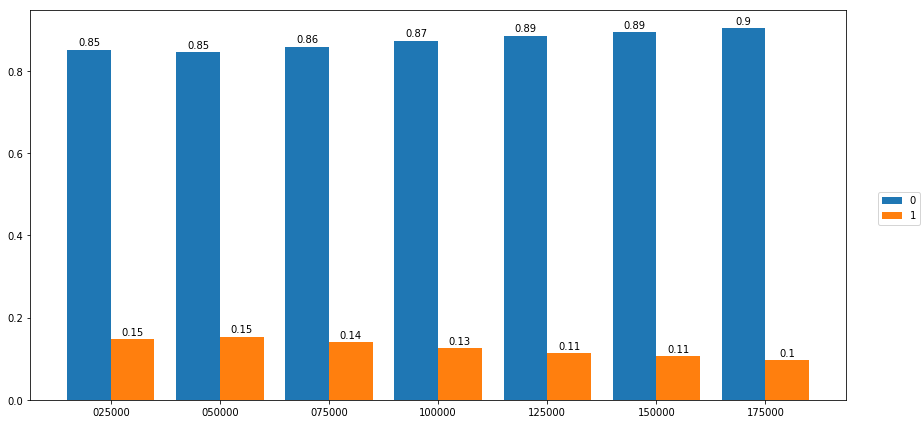

In [29]:
ax = dexplot.aggplot(agg = "income_bin", hue = "loan_status", data = df, normalize = "income_bin")
for p in ax.patches:
    height = p.get_height()
    if math.isnan(float(height)):
        height = 0
    ax.text(p.get_x() + p.get_width()/2, 
        height + 0.01, f"{round(height, 2)}", ha = "center")



As the income bins increase, the percentage of defaults decrease 

In [78]:
df.dti = df.dti.fillna(0)

In [83]:
df.dti.describe()

count    2.092883e+06
mean     1.858385e+01
std      1.139569e+01
min     -1.000000e+00
25%      1.189000e+01
50%      1.776000e+01
75%      2.434000e+01
max      9.990000e+02
Name: dti, dtype: float64

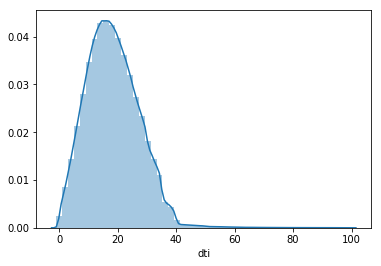

In [93]:
sns.distplot(df[df.dti < 100]["dti"]);

Aside from a few points that have extreme dti's, the distribution of dti's appear relatively symmetric about 18

In [55]:
df.dti.mean()

18.584680746754326

In [6]:
df["dti_bin"] = df["dti"].apply(lambda x: "10" if x <= 10 
                               else "20" if (x > 10 and x <=20)
                                else "30" if (x > 20 and x <= 30)
                                else "40" if (x > 30 and x <= 40)
                                else "50" if (x > 40 and x <= 50)
                                else "999") 

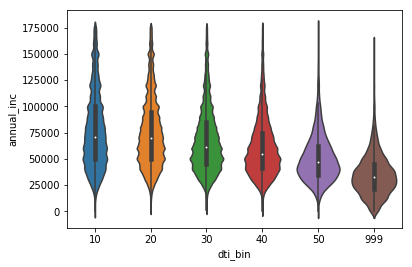

In [63]:
sns.violinplot(x = "dti_bin", y = "annual_inc", data = df[df.annual_inc <= 175000]);

The income distributions look pretty similar to each other across the different dti bins. However, it appears that the higher the income, the lower the dti

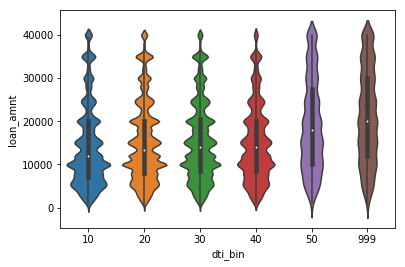

In [59]:
sns.violinplot(x = "dti_bin", y = "loan_amnt", data = df);


In [64]:
df.dti_bin.value_counts()

20     864394
30     632289
10     377608
40     197127
50      11601
999      9864
Name: dti_bin, dtype: int64

The distribution in the loan amount between the different dti bins are all similar except for 50 and 999 and that's probably because there aren't that many dti's that are > 40 so there aren't enough points to really define the distribution shape

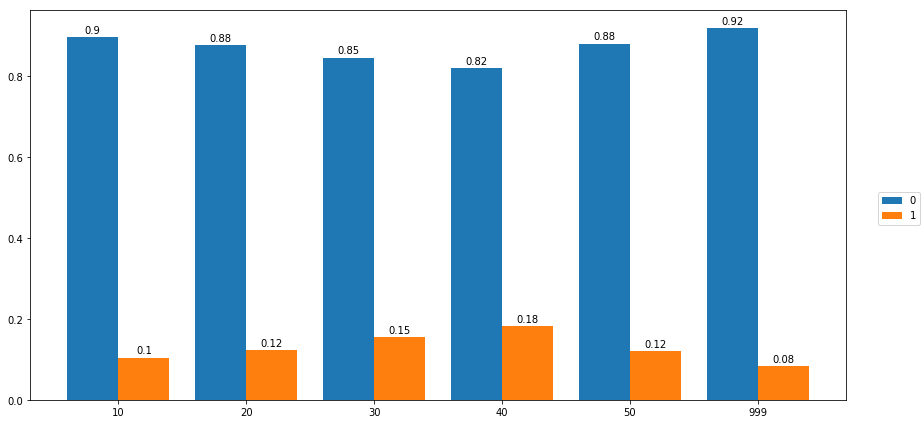

In [69]:
ax = dexplot.aggplot(agg = "dti_bin", hue = "loan_status", data = df, normalize = "dti_bin")
for p in ax.patches:
    height = p.get_height()
    if math.isnan(float(height)):
        height = 0
    ax.text(p.get_x() + p.get_width()/2, 
        height + 0.01, f"{round(height, 2)}", ha = "center")



Looking at dti, the percentage of defaults increases until the dti reaches 40, then decreases after 

### Random Forest 

In [7]:
df_copy = df.copy()
df_copy = df_copy.drop(["emp_title", "income_bin", "dti_bin", "term_ 36 months", "term_ 60 months"], axis = 1)
df_copy = pd.get_dummies(df_copy)

In [84]:
df_copy.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,annual_inc,tot_hi_cred_lim,chargeoff_within_12_mths,total_pymnt,pub_rec_bankruptcies,dti,delinq_2yrs,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status,pymnt_plan,zip_code,term,emp_length,mths_since_last_delinq,issue_d,earliest_cr_line,loan_status,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,2500,2500,2500.0,84.92,13.56,55000.0,60124.0,0.0,167.02,1.0,18.24,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,109,36,10,226.0,0,6453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,30000,30000,30000.0,777.23,18.94,90000.0,372872.0,0.0,1507.11,1.0,26.52,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,713,60,10,71.0,0,11506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,5000,5000,5000.0,180.69,17.97,59280.0,136927.0,0.0,353.89,0.0,10.51,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,490,36,6,226.0,0,2801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4000,4000,4000.0,146.51,18.94,92000.0,385183.0,0.0,286.71,0.0,16.74,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,985,36,10,226.0,0,4686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,30000,30000,30000.0,731.78,16.14,57250.0,157548.0,0.0,1423.21,0.0,26.35,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,212,60,10,226.0,0,6574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [75]:
X = np.array(df_copy.drop("loan_status", axis = 1).fillna(-1))
Y = df_copy["loan_status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 23154)
df_copy.shape

(2092883, 134)

In [76]:
validation_indices = pd.DataFrame({"indices": np.arange(X_train.shape[0])}).sample(frac=1, random_state = 1252)
num_trains = round(X_train.shape[0] * 0.8)
num_validate = X_train.shape[0] - num_trains
validation_indices.index = pd.Series(np.arange(X_train.shape[0]))
#validation_indices
validation_indices["test_fold"] = pd.Series(np.concatenate([np.repeat(-1, num_trains), np.repeat(0, num_validate)]))
validation_indices = validation_indices.sort_values("indices")
ps = PredefinedSplit(list(validation_indices["test_fold"]))

In [80]:
X_train.shape

(1465018, 133)

In [ ]:
rf = RandomForestClassifier(random_state = 123598, min_samples_leaf= 100, n_estimators=1000, max_features= 100, min_impurity_split= 0.001)
rf.fit(X_train, Y_train)

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/anaconda3/envs/info154/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jordanfan/an

In [82]:
rf = RandomForestClassifier(random_state = 123587)
#optimize over recall because more important to identify the ones that default and there are a lot less defaults 
#A lot of data so don't need to do cross validation, normal one 

parameters = {"min_samples_leaf": [5, 10, 25, 50, 100], 
             "n_estimators": [500, 1000, 1500, 2000], 
             "max_features": [20, 40, 60, 80, 100, 120], 
             "min_impurity_split": [int(x) for x in np.linspace(0.0000001, 0.001, 3)]}

clf = GridSearchCV(estimator = rf, param_grid = parameters, verbose = 10, n_jobs = -1, cv = ps, scoring = "recall")
clf.fit(X_train, Y_train)


Fitting 1 folds for each of 360 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 